In [5]:
# import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available 

import os
for dirname, _, filenames in os.walk('D:\\NED_PGD_Online\\4thsemester\\PIC'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10004.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10005.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10012.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10013.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10017.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10021.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\1003.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10034.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10038.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10040.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10043.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10045.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10047.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10048.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10052.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10054.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10059.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\10060.jpg
D:\NED_PGD_Online\4thsemester\PIC\seg_pred\1006

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.applications import VGG16

from PIL import Image # image loading

import os
from glob import glob
import cv2
import tensorflow as tf
import keras

In [3]:
train_path = 'D:\\NED_PGD_Online\\4thsemester\\PIC\\seg_train'
test_path = 'D:\\NED_PGD_Online\\4thsemester\\PIC\\seg_test'
pred_path = 'D:\\NED_PGD_Online\\4thsemester\\PIC\\seg_pred/'

In [4]:
for folder in  os.listdir(train_path) : 
    files = glob(pathname= str( train_path + folder + '/*.jpg'))
    print(f'Found {len(files)} in folder {folder}')

Found 0 in folder buildings
Found 0 in folder forest
Found 0 in folder glacier
Found 0 in folder mountain
Found 0 in folder sea
Found 0 in folder street


In [5]:
for folder in  os.listdir(test_path) : 
    files = glob(pathname= str( test_path + folder + '/*.jpg'))
    print(f'Found {len(files)} in folder {folder}')

Found 0 in folder buildings
Found 0 in folder forest
Found 0 in folder glacier
Found 0 in folder mountain
Found 0 in folder sea
Found 0 in folder street


In [6]:
files = glob(pathname= str(pred_path +'*.jpg'))
print(f'Found {len(files)}')

Found 7301


In [7]:
size = []
for folder in os.listdir(train_path):
    files = glob(pathname= str( train_path + folder + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

C:\Users\DewanSKhan\AppData\Local\Temp\ipykernel_10856\3777045685.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(size).value_counts()


Series([], dtype: int64)

In [8]:
size = []
for folder in  os.listdir(test_path) : 
    files = glob(pathname= str( test_path + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

C:\Users\DewanSKhan\AppData\Local\Temp\ipykernel_10856\1468855397.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(size).value_counts()


Series([], dtype: int64)

In [9]:
size = []
files = glob(pathname= str(pred_path +'*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(139, 150, 3)       1
(108, 150, 3)       1
(129, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(144, 150, 3)       1
(133, 150, 3)       1
(112, 150, 3)       1
(100, 150, 3)       1
(374, 500, 3)       1
(126, 150, 3)       1
(124, 150, 3)       1
(131, 150, 3)       1
Name: count, dtype: int64

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.25,
                                  validation_split=0.2,
                                  width_shift_range=0.15,
                                  height_shift_range=0.15,
                                  horizontal_flip = True,  
                                  vertical_flip = False,
                                  fill_mode='nearest')

# Generate the train and validation 
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=128,
    subset='training',
    shuffle=True,
    class_mode="categorical",
)

# Generate the train and validation 
val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=128,
    class_mode="categorical",
    shuffle=False,
    subset="validation"
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate the train and validation generators
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=128,
    shuffle=False,
    class_mode="categorical",
)

Found 3000 images belonging to 6 classes.


In [11]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes \n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes 

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


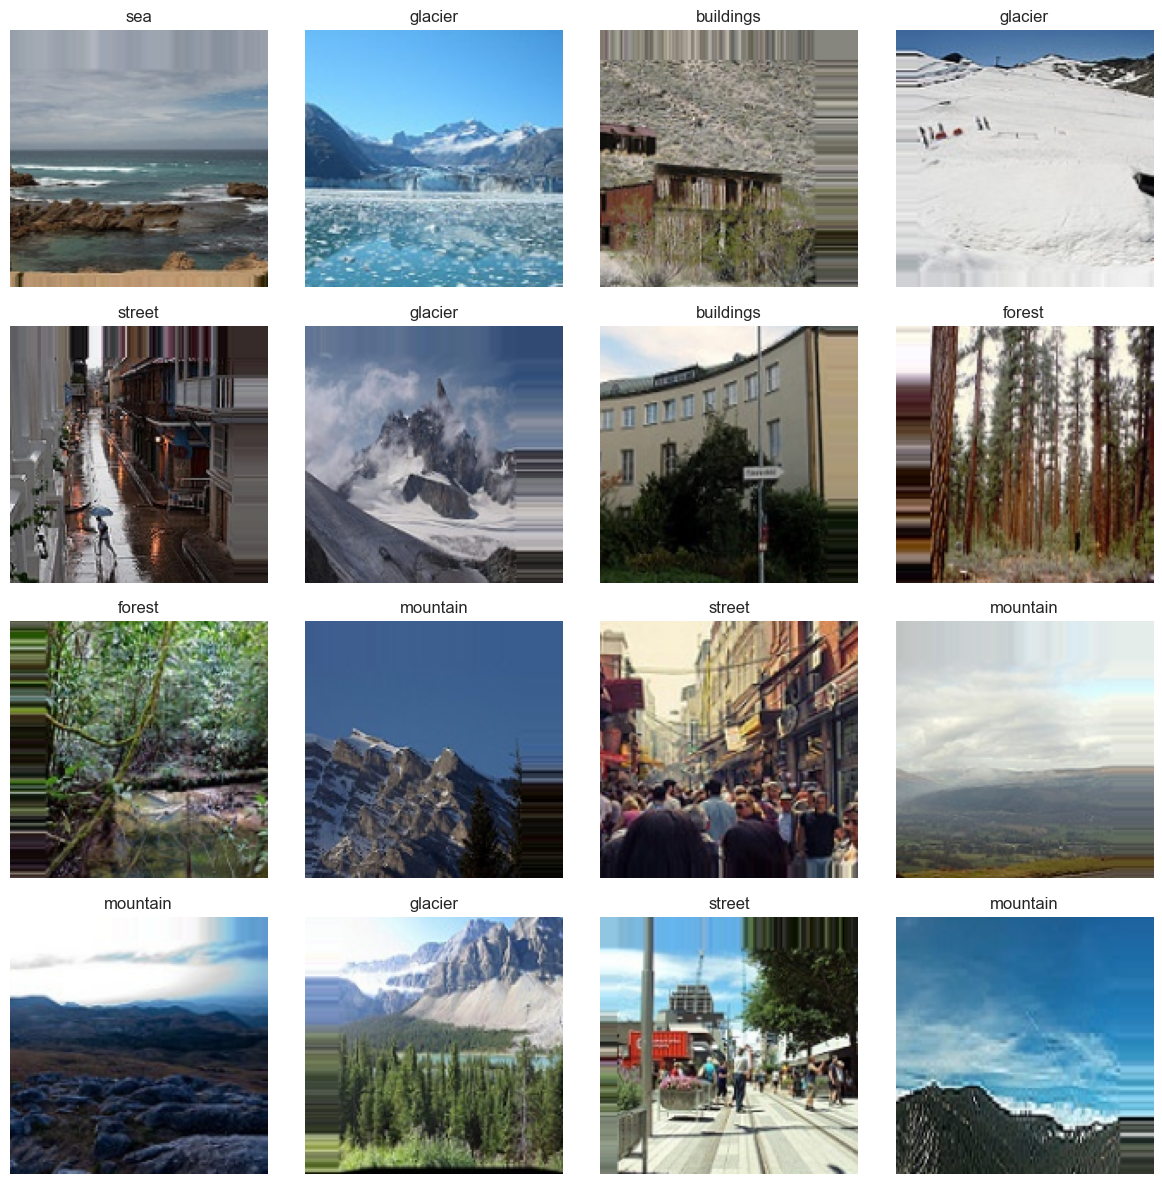

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
idx = 0

for i in range(4):
    for j in range(4):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.show()

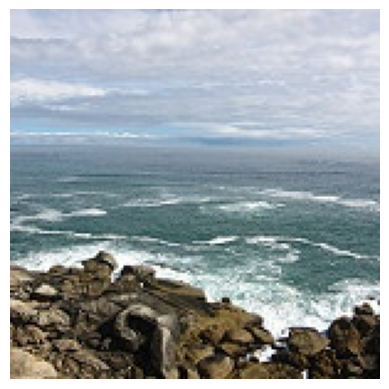

In [40]:
img = Image.open(train_path + "\\Sea\\7.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

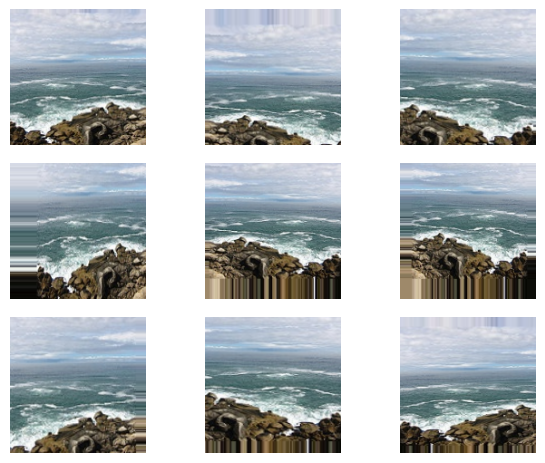

In [41]:
img_array = np.array(img)
img_array = img_array.reshape((1, 150, 150, 3))

for i, batch in enumerate (train_datagen.flow(img_array, batch_size = 1)):
  
    plt.subplot(3, 3, i+1)
    plt.imshow(batch[0])
    plt.axis('off')
    
    if i == 8: break

# Show the plot
plt.tight_layout()
plt.show()


In [42]:
VGG16 = VGG16(include_top = False,
                       weights = 'imagenet',
                       input_shape = (150,150,3))


58889256/58889256 [==============================] - 17s 0us/step


In [43]:
model_VGG16 = Sequential()
model_VGG16.add(VGG16)
model_VGG16.add(MaxPool2D())
model_VGG16.add(Dropout(0.5))
model_VGG16.add(BatchNormalization())
model_VGG16.add(Flatten())
model_VGG16.add(Dropout(0.2)) 
model_VGG16.add(Dense(256, activation="relu"))
model_VGG16.add(Dense(6, activation="softmax" , name="classification"))

In [44]:
# Menambahkan optimizer, loss, dan metrics
model_VGG16.compile(optimizer=Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

# Ringkasan Model
model_VGG16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 512)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 2, 512)         0         
                                                                 
 batch_normalization (BatchN  (None, 2, 2, 512)        2048      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2048)             

In [45]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    verbose=1,
    mode="max",
    restore_best_weights=True)


In [4]:
history = model_VGG16.fit(
                        train_generator,
                        steps_per_epoch = 11230// 128,
                        epochs = 50,
                        validation_data = val_generator,
                        validation_steps =  2804// 128,
                        callbacks=[learning_rate_reduction, early_stopping],
                        verbose=2
                        )


NameError: name 'model_VGG16' is not defined

In [3]:
ModelLoss, ModelAccuracy = model_VGG16.evaluate(test_generator)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

NameError: name 'model_VGG16' is not defined

In [ ]:
model_VGG16.save("model_VGG16.h5", include_optimizer=True)

In [ ]:
predictions = model_VGG16.predict(test_generator)


In [ ]:
y_test = test_generator.classes
y_pred = np.argmax(predictions, axis=1)
